In [ ]:
#В домашней работе предлагается применить PCA трехмерным данным по оттоку, которые содержатся в файле data/client_segmentation.csv. 
#В файле содержится информация по клиентам оператора связи о том, как изменилось потребление услуг оператора за два месяца:

#    call_diff доля звонков
#    sms_diff доля смс
#    доля интернет-трафика traffic_diff


In [ ]:
#

#Все показатели вычисляются по формуле

#new_value−old_valueold_value

#В последней колонке customes_class содержится метка по оттоку:

#    0 - активный пользователя
#    1 - "спящий" пользователь (редко пользуется услугами)
#    2 - пользователь, который ушел в отток

#Получается у нас три фичи (датасет трёхмерный) и задача классификации на три класса.

#загружаем датасет в память


In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib inline
df_source = pd.read_csv('client_segmentation.csv')
X = df_source[['call_diff','sms_diff','traffic_diff']].values
y = df_source.customes_class.values

df_source

,call_diff,sms_diff,traffic_diff,customes_class
0,-0.666421,0.444911,-0.273538,0.0
1,-0.889273,-0.537896,-1.959469,2.0
2,-0.841503,0.846665,0.727606,0.0
3,1.389749,0.390911,1.789246,1.0
4,-1.228211,-1.375899,-1.434209,2.0
...,...,...,...,...
95,1.506425,-0.483638,2.096115,1.0
96,-1.948987,-2.192459,0.943793,2.0
97,-1.384253,1.522339,2.854824,0.0
98,1.957208,0.429976,2.750221,1.0


In [ ]:
# 

#В рамках домашнего задания

#    Визуализируйте первый и третий столбец из набора данных call_diff и traffic_diff в виде scatter
#    Постройте PCA сожмите их до одномерного случая, визуализируйте результат



C:\Users\DS\AppData\Local\Temp\ipykernel_1972\3901353573.py:4: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  ax.scatter(df_source['call_diff'], df_source['traffic_diff'], s=40,  marker='o', cmap='viridis')


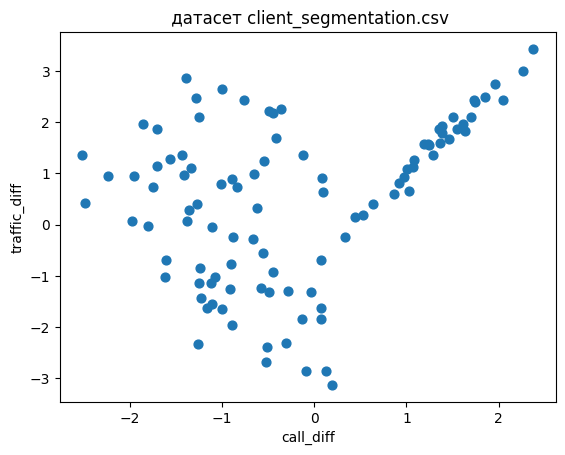

In [9]:
fig, ax = plt.subplots()

# Визуализируйте данные
ax.scatter(df_source['call_diff'], df_source['traffic_diff'], s=40,  marker='o', cmap='viridis')

#  метки осей и заголовок
ax.set_xlabel('call_diff')
ax.set_ylabel('traffic_diff')
ax.set_title(' датасет client_segmentation.csv')

#  график
plt.show()

In [10]:
from sklearn.decomposition import PCA

pca = PCA(n_components=1).fit(X)
X_pca = pca.transform(X)
X_pca[:10]

array([[-0.75744517],
       [-2.61154618],
       [ 0.13301346],
       [ 1.74983161],
       [-2.69734129],
       [ 0.70860533],
       [ 1.27113452],
       [-2.16755366],
       [-2.58986361],
       [ 1.6981062 ]])

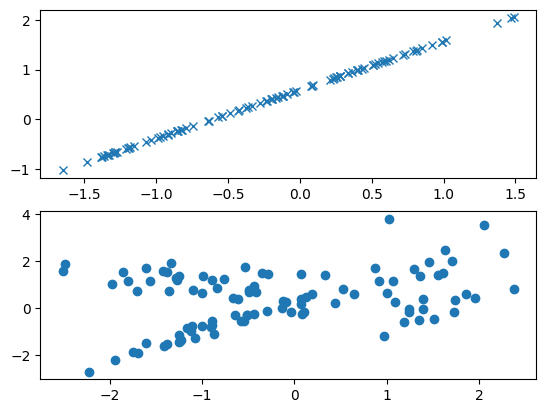

In [11]:
X_new = pca.inverse_transform(X_pca)

plt.figure(1)
plt.subplot(211)
plt.plot(X_new[:,0], X_new[:,1], 'x')

plt.subplot(212)
plt.plot(X[:,0], X[:,1], 'o')
plt.show()

In [ ]:
# Задание высокого уровня

#Сжимать двумерные данные не очень интересно, давайте попробуем применить PCA к трёхмерному датасету и сжать данные до размерности n=2.

#Для наглядности и визуализируем наши трёхмерные данные в 3D:

In [2]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

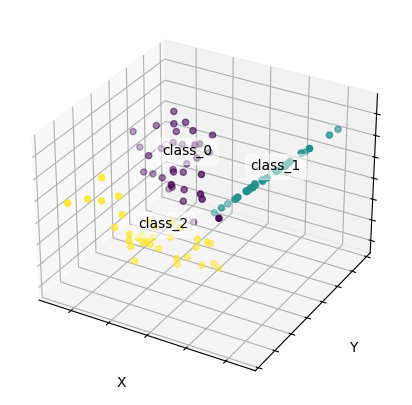

In [9]:

#
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection='3d')

#  метки осей
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

#  метки на осях
ax.set_xticklabels([])
ax.set_yticklabels([])
ax.set_zticklabels([])

#  уникальные метки классов
num_labels = np.unique(y).size

#  текстовые метки для каждого класса
for name, label in [('class_%d' % i, i) for i in range(num_labels)]:
    ax.text3D(X[y == label, 0].mean(), X[y == label, 1].mean() + 0.5,
              X[y == label, 2].mean(), name, horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'))


ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y)

#  график
plt.show()

In [ ]:
# С помощью класса sklearn.decomposition.PCA выполните понижение размерности признакового пространства с n=3 до n=2 и  снова визуализируйте данные.

In [12]:
from sklearn.decomposition import PCA
pca1 = PCA(n_components=2).fit(X)
X_pca1 = pca1.transform(X)
X_pca1[:10]

array([[-0.75744517, -0.16623077],
       [-2.61154618, -0.5951692 ],
       [ 0.13301346,  0.37383597],
       [ 1.74983161, -0.27582433],
       [-2.69734129,  0.31624463],
       [ 0.70860533,  0.51547171],
       [ 1.27113452, -0.04822069],
       [-2.16755366, -0.04137214],
       [-2.58986361, -0.08695463],
       [ 1.6981062 ,  1.16822327]])

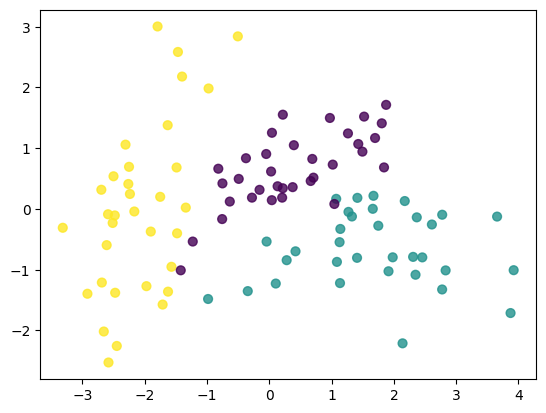

In [17]:
plt.scatter(X_pca1[:, 0], X_pca1[:, 1], s=40, c=y, marker='o', alpha=0.8, label='data')
plt.show()